## Modelos Analíticos Parte II. ML Supervisado

## Objetivos

1. Profundizar en el tipo de Aprendizaje Supervisado.
2. Ver un ejemplo de modelo de regresión.
3. Ver un ejemplo de modelo de clasificación.

## 1. Modelos de *machine learning*

El propósito de los modelos de *machine learning* es encontrar características en datos conocidos (del pasado), ya sea para comprender algún fenómeno o para hacer alguna estimación sobre datos nuevos (del futuro). En cualquier caso, estos modelos son "entrenados" con base en datos observados.

Los modelos de *machine learning* comúnmente se clasifican en dos categorias: supervisados, los cuales cuentan con una variable de respuesta que se quiere predecir; no supervisados, los cuales se enfocan en encontrar relaciones subyacentes entre los datos sin necesidad de una variable de respuesta. Por ejemplo, si tenemos imágenes médicas acompañadas del diagnóstico de un profesional, quien indica si existe una patología o no, podriamos plantear un modelo de aprendizaje supervisado. Si clasificamos las observaciones en estas dos categorías (patología, no patología), podemos utilizarlas para "entrenar" nuestro modelo y posteriormente determinar, sin la ayuda del médico, si nuevas imágenes corresponden a la patología o no.

<br>
<img src='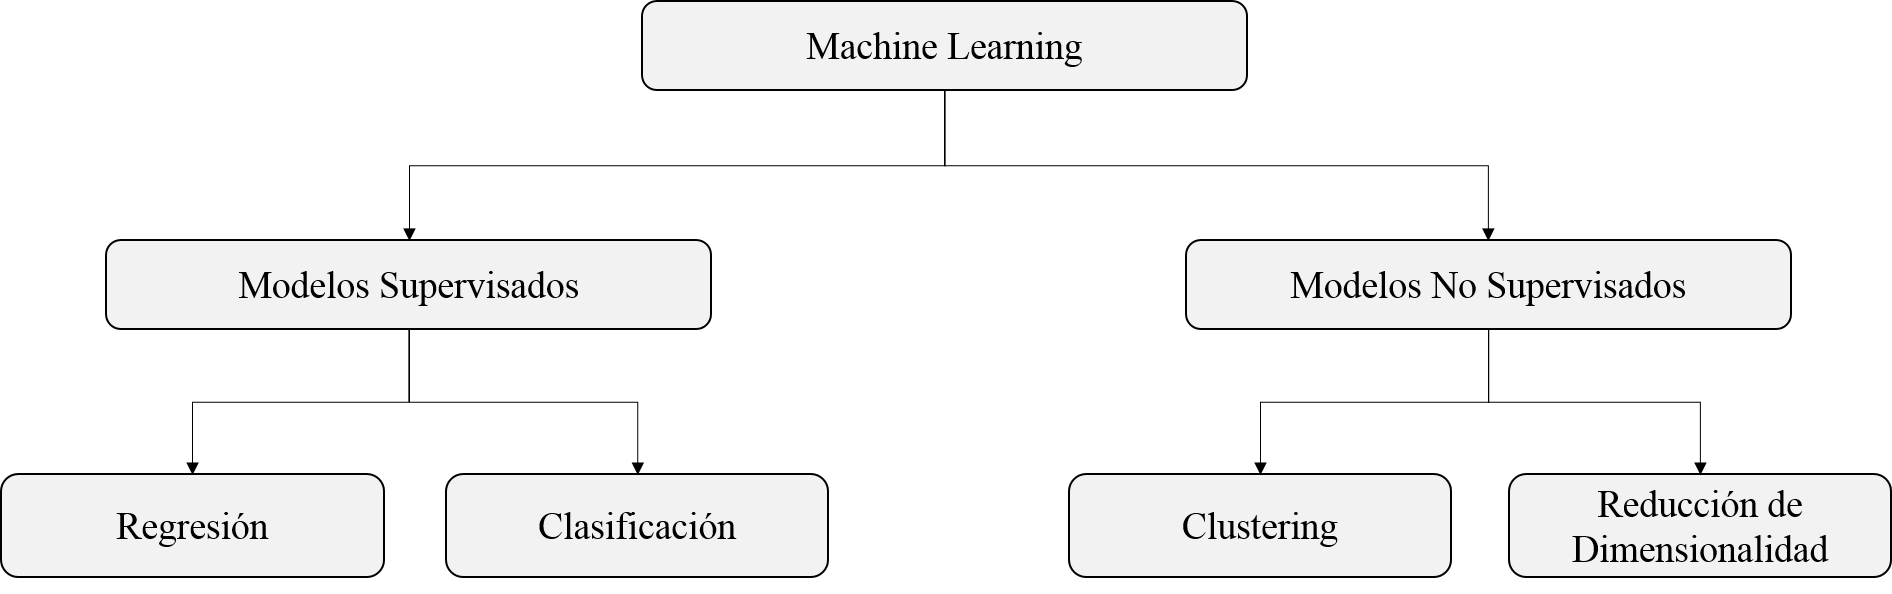' width=650x>
<br>
<center><b>Figura 1:</b> taxonomía general de modelos de <i>machine learning</i>
</center>


El aprendizaje supervisado nos permite abordar dos tipos de problemas: regresión y clasificación. En los problemas de regresión el objetivo es predecir una variable de respuesta que toma valores continuos (p.ej., estimar el precio de una casa con base en sus características), mientras que en los problemas de clasificación el objetivo es predecir una variable de respuesta que toma valores discretos (p.ej., estimar si una imagen corresponde a un objeto u otro).

El aprendizaje no supervisado nos permite abordar dos tipos de problemas: clustering y reducción de dimensionalidad. En los problemas de clustering el objetivo es encontrar conjuntos de observaciones con características similares que podrían pertenecer a una misma clase o grupo. En los problemas de reducción de dimensionalidad el objetivo es encontrar las características que representan la información relevante de un conjunto de datos de la manera más concisa.

### 1.1. Pasos típicos para desarrollar un modelo en el paquete scikit-learn

Scikit-learn es un paquete que provee implementaciones eficientes de muchos algoritmos comunes de *machine learning* con una API (interfaz de programación de aplicaciones) sencilla de utilizar. En general, llevamos a cabo los siguientes pasos al momento de crear un modelo:

**1. Importar un módulo del paquete `sklearn` que contiene el modelo que vamos a utilizar:** por ejemplo, si queremos desarrollar un modelo de regresión lineal, debemos importar el módulo correspondiente: `linear_model`.
~~~ python
from sklearn import linear_model
~~~

**2. Elegir los datos que queremos analizar:** en general, podemos pensar en los datos de entrada de un modelo de *machine learning* como una matriz, que llamaremos $X$, con $m$ filas y $n$ columnas, donde $m$ corresponde al número de muestras u observaciones (*samples*) y $n$ corresponde al número de variables o características (*features*). En el caso de modelos no supervisados, esa matriz será suficiente. Para un modelo supervisado, requerimos una columna adicional de datos, $y$ (con $m$ filas, una por muestra), correspondientes a la variable de respuesta. Supongamos que contamos con un `DataFrame` (`DF`) en el que las columnas 0 a 4 son variables independientes (*features*) y la columna 5 es la variable de respuesta. La selección de datos para la regresión será:
~~~python
X = DF.iloc[:,:5]
y = DF.iloc[:,5]
~~~

**3. Crear conjuntos de datos para entrenamiento y prueba:** luego de dividir los datos en $X$ y en $y$, debemos crear un conjunto de datos de entrenamiento, con el cual se entrenará el modelo, y un conjunto de datos de prueba, con el cual se verificará la efectividad del modelo. Es fundamental llevar a cabo este paso ya que, de lo contrario, estaríamos entrenando y probando al modelo con el mismo set de datos, lo cual no nos permitiría saber si el modelo funciona correctamente o si simplemente se “aprendió” los resultados óptimos. Una analogía útil al momento de pensar en esta situación es la de un profesor que le muestra las respuestas de un parcial a sus estudiantes y luego los evalúa con las mismas preguntas. Normalmente utilizamos el 80% de los datos para entrenar el modelo y el 20% para probarlo.
~~~python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
~~~

**4. Declarar una instancia del modelo:** cada módulo dispone de diversos modelos. Por ejemplo, dentro de `linear_model` podemos encontrar la clase `LinearRegression`, que contiene los elementos necesarios para desarrollar un modelo de regresión lineal. Para proceder, debemos declarar un objeto de la clase `LinearRegression` como se muestra a continuación.
~~~python
mi_modelo = linear_model.LinearRegression()
~~~

**5. Entrenar el modelo:** el objeto `mi_modelo` cuenta con los métodos y atributos necesarios para desarrollar un modelo de regresión. El método más común en los modelos de *machine learning* es `fit`, pues es el encargado de entrenar el modelo de acuerdo a los datos suministrados para encontrar los parámetros que mejor se ajustan. A contiuación vemos la instrucción para entrenar el modelo:
~~~python
mi_modelo.fit(X_train,y_train)
~~~

**6. Consultar los resultados del modelo:** en el caso del modelo de regresión lineal, nos interesa conocer los coeficientes que acompañan a cada una de las variables del modelo. Cuando ejecutamos el método `fit`, estos valores son almacenados en el atributo `coef_`; el caracter ( _ ) es una convención para los atributos calculados internamente por el método `fit`. Así, podemos consultar estos valores de la siguiente manera:
~~~python
print(mi_modelo.coef_)
~~~

**7. Utilizar el modelo para predecir:** por lo general, queremos aplicar nuestro modelo entrenado a nuevas observaciones de datos. Para esto utilizamos el método `predict`, que recibe por parámetro las columnas correspondientes a variables independientes ($X$) y genera las predicciones correspondientes para la variable de respuesta ($y$). A continuación, utilizamos los datos de prueba (`X_test`) para predecir la variable de respuesta.
~~~python
y_estimado = mi_modelo.predict(X_test)
~~~

**8. Evaluar el desempeño del modelo:** es importante asegurarnos que el modelo que hemos entrenado se desempeña bien con datos nuevos y no se ha sobreajustado con los datos de entrenamiento. En este caso, lo usual es medir qué tan cercanas son las predicciones hechas por el modelo (`y_estimado`) a los valores reales de la variable de respuesta de los datos de prueba (`y_test`). En el caso de la regresión lineal, una métrica común es el $R^2$, el cual puede ser calculado con el método `r2_score` del módulo `sklearn.metrics`. Procedemos a importar la funcion y estimar la métrica:
~~~python
from sklearn.metrics import r2_score
mi_r2 = r2_score(y_test, y_estimado)
~~~

También podemos usar el método `score` para conocer la precisión del modelo a partir de los datos de prueba:
~~~python
mi_r2 = mi_modelo.score(X_test, y_test)
~~~  

### 1.2. Regresión lineal múltiple

Una regresión lineal múltiple es el caso de una regresión lineal simple con múltiples variables independientes $X$. La ecuación general para este tipo de regresión es la siguiente:$$y = β_0 + β_1X_1 + β_2X_2 + ... + β_nX_n + e$$

El objetivo de este tipo de regresión es incorporar la información de varias variables para explicar conjuntamente el comportamiento de la variable de respuesta.

##### Ejemplo

El objetivo es predecir el precio de una casa a partir de múltiples variables. Para esto usaremos todas las variables que existen en el set de datos de vivienda de Boston. Entre estas variables encontramos el número de habitaciones de la vivienda, número de crímenes en el área cercana, costo de impuestos, y algunas más.

De este modo, empezaremos cargando el set de datos y separando la variable de interes de las otras variables:

In [ ]:
import numpy as np
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

# Importamos los datos
data_boston = datasets.load_boston()

# Elegimos los datos que queremos analizar

# Definimos todas las variables como variables independientes
X = data_boston.data

# Definimos la variable de respuesta utilizando el atributo target del dataset de sklearn
y = data_boston.target